# Example for A/B Test

# 1.Designing our experiment
# 2.Collecting and preparing the data
# 3.Visualising the results
# 4.Testing the hypothesis
# 5.Drawing conclusions


In [13]:
## Extract data from Kaggle

import pandas as pd
import numpy as np

import scipy.stats as stats
import statsmodels.stats.api as sms

import matplotlib as mpl
import matplotlib.pyplot as plt
#import seanborn as sns


from math import ceil

%matplotlib inline


In [29]:
# calculate sample size
effect_size = sms.proportion_effectsize(0.1, 0.2) # calculate the effect zize based on ur expected rates
print(effect_size)

-0.2837941092083278


In [31]:
required_n = sms.NormalIndPower().solve_power(
effect_size , power = 0.8 , alpha = 0.05, ratio = 1) # calculate sample size

required_n = ceil(required_n)
print(required_n)

# at least the number of observations for each group and have a 80% chance to test it signigficant 

195


In [60]:
print("Having set the power parameter to 0.8 in practice means that if there exists an actual difference in conversion rate between our designs, assuming the difference is the one we estimated (13% vs. 15%), we have about 80% chance to detect it as statistically significant in our test with the sample size we calculated.")

Having set the power parameter to 0.8 in practice means that if there exists an actual difference in conversion rate between our designs, assuming the difference is the one we estimated (13% vs. 15%), we have about 80% chance to detect it as statistically significant in our test with the sample size we calculated.


In [4]:
pip install fsspec

Note: you may need to restart the kernel to use updated packages.


In [15]:
## read data
df = pd.read_csv('C://mentor//A.B test//ab_data.csv')

In [18]:
df.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [19]:
freq_check = df['user_id'].value_counts()
print(freq_check.value_counts())

1    286690
2      3894
Name: user_id, dtype: int64


In [20]:
pd.crosstab(df['group'],df['landing_page'])

landing_page,new_page,old_page
group,,
control,1928,145274
treatment,145311,1965


In [21]:

drop_second = freq_check[freq_check > 1].index
#use_num = drop_second.sum()
#print(use_num)
#print('The updated dataset now has %s' %(use_num))

In [22]:
drop_second

Int64Index([805339, 754884, 722274, 783176, 898232, 899018, 904570, 842042,
            881123, 858720,
            ...
            721188, 902463, 713355, 827417, 655283, 847058, 889392, 664150,
            835401, 736955],
           dtype='int64', length=3894)

In [23]:
df_first = df[~df['user_id'].isin(drop_second)]

In [25]:
df_first.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [26]:
df_first.info()
df_first.shape[0]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286690 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       286690 non-null  int64 
 1   timestamp     286690 non-null  object
 2   group         286690 non-null  object
 3   landing_page  286690 non-null  object
 4   converted     286690 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.1+ MB


286690

In [27]:
# after remove second click persion
pd.crosstab(df_first['group'],df_first['landing_page'])

landing_page,new_page,old_page
group,,
control,0,143293
treatment,143397,0


In [33]:
## Sampling
control = df_first[df_first['group'] == 'control'].sample(n=required_n, random_state = 10 )
treatment = df_first[df_first['group']=='treatment'].sample(n=required_n, random_state = 10)

In [34]:
ab_test = pd.concat([control, treatment], axis = 0)

In [35]:
ab_test.info()
ab_test.index[0:5]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 144439 to 202205
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       390 non-null    int64 
 1   timestamp     390 non-null    object
 2   group         390 non-null    object
 3   landing_page  390 non-null    object
 4   converted     390 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 18.3+ KB


Int64Index([144439, 113984, 273274, 112015, 221102], dtype='int64')

In [36]:
ab_test.head()

,user_id,timestamp,group,landing_page,converted
144439,691351,2017-01-23 07:04:48.646252,control,old_page,0
113984,782396,2017-01-16 03:06:22.712060,control,old_page,0
273274,802583,2017-01-18 23:26:41.031648,control,old_page,0
112015,826544,2017-01-17 16:32:30.146886,control,old_page,0
221102,786577,2017-01-12 02:22:59.385836,control,old_page,0


In [37]:
# show the result

conversion_rate = ab_test.groupby('group')['converted'].count()
conversion_rate
#print(conversion_rate)

group
control      195
treatment    195
Name: converted, dtype: int64

In [76]:
std_p = lambda x: np.std(x, ddof=0)              # Std. deviation of the proportion
se_p = lambda x: stats.sem(x, ddof=0)            # Std. error of the proportion (std / sqrt(n))
mean = lambda x: np.mean(x)
conversion_rate.head()

group
control      195
treatment    195
Name: converted, dtype: int64

In [57]:
std_p

<function __main__.<lambda>(x)>

In [37]:
conversion_rates = conversion_rate.agg(['mean', 'std_p', 'se_p'])
#conversion_rates.columns = ['conversion_rate', 'std_deviation', 'std_error']

ValueError: std_p is an unknown string function

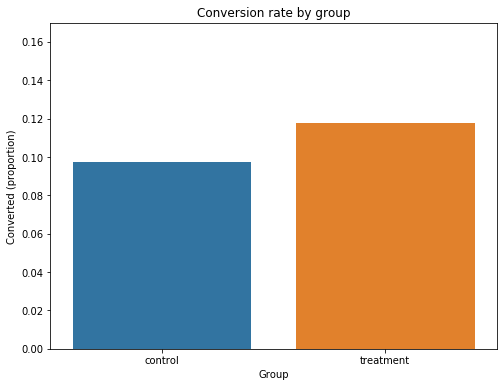

In [38]:
import seaborn as sns
plt.figure(figsize=(8,6))

sns.barplot(x=ab_test['group'], y=ab_test['converted'], ci=False)

plt.ylim(0, 0.17)
plt.title('Conversion rate by group')
plt.xlabel('Group')
plt.ylabel('Converted (proportion)');

In [78]:
# test 

In [39]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
control_results = ab_test[ab_test['group'] == 'control']['converted']
treatment_results = ab_test[ab_test['group'] == 'treatment']['converted']
n_con = control_results.count()
n_treat = treatment_results.count()
successes = [control_results.sum(), treatment_results.sum()]
nobs = [n_con, n_treat]

In [40]:

z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'ci 95% for control group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'ci 95% for treatment group: [{lower_treat:.3f}, {upper_treat:.3f}]')

z statistic: -0.65
p-value: 0.513
ci 95% for control group: [0.056, 0.139]
ci 95% for treatment group: [0.073, 0.163]
